Question 0: Predicting Job Salary
First step, import csv and python modules needed for analysis

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

salary = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/salary_uk.csv")
salary.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


Lets view the job categories and associated salary distribution via a seaborn boxplot.

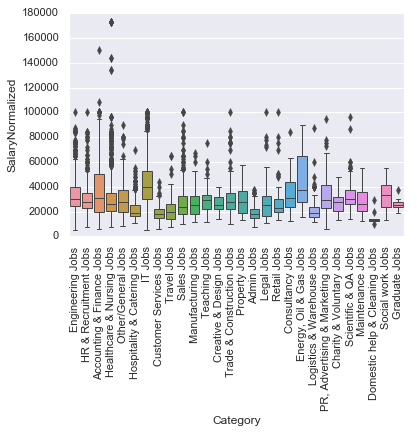

In [3]:
import seaborn as sns
sns.set()
s=sns.boxplot(x="Category", y="SalaryNormalized",data=salary, linewidth=1)
s.set_xticklabels(s.get_xticklabels(),rotation="vertical");

From the boxplot, there is variability in salary throughout all categories. Some have more narrow salary distrubution than others. Accounting and Healthcare have a few outliers with very high salary compared to the average. There may be some trends, but more information will be needed to predict salary.

Let's see the data columns and there types.

In [5]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Id                    10000 non-null int64
Title                 9999 non-null object
FullDescription       10000 non-null object
LocationRaw           10000 non-null object
LocationNormalized    10000 non-null object
ContractType          3556 non-null object
ContractTime          4737 non-null object
Company               5951 non-null object
Category              10000 non-null object
SalaryRaw             10000 non-null object
SalaryNormalized      10000 non-null int64
SourceName            10000 non-null object
dtypes: int64(2), object(10)
memory usage: 937.6+ KB


Just to get an overall sense of where the salary figures are, I will make a histogram of just salary.

(array([  8.,  12.,   9.,  66., 300., 446., 520., 592., 489., 376., 649.,
        838., 451., 656., 598., 286., 366., 462., 182., 296., 353., 121.,
        245., 282.,  51., 136., 195.,  32.,  93., 138.,  26.,  46., 120.,
          7.,  48.,  59.,  21.,  21.,  47.,  22.,  15.,  54.,  11.,  22.,
         32.,  12.,  56.,  44.,   7.,   5.,  22.,   0.,   3.,   6.,  10.,
          4.,  20.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          6.]),
 array([  5184.  ,   6860.16,   8536.32,  10212.48,  11888.64,  13564.8 ,
         15240.96,  16917.12,  18593.28,  20269.44,  21945.6 ,  23621.76,
         25297.92,  26974.08,  28650.24,  30326.4 ,  32002.56,  33678.72,
         35354.88,  37031.04,  38707.2 ,  40383.36,  42059.52,  43735.68,
         45411.84,  47

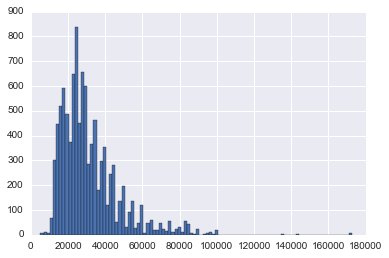

In [6]:
plt.hist(salary.SalaryNormalized, bins=100)

Looks like most salary values are bettwen 20k and 40k, with a longer trail of fewer instances toward the higher salaries

In [72]:
salary.dtypes

Id                       int64
Title                 category
FullDescription         object
LocationRaw             object
LocationNormalized    category
ContractType          category
ContractTime          category
Company               category
Category              category
SalaryRaw               object
SalaryNormalized         int64
SourceName            category
titleID                  int64
LocationID               int64
ConTypeID                int64
ConTimeID                int64
CompanyID                int64
CatID                    int64
SourceID                 int64
engineer                  bool
manager                   bool
analyst                   bool
dtype: object

We have a mix of many different types of variables, and some that will not benefit our analysis.

We will first vectorize the long text discription of each job announcement using the feature extraction feature to find the term frequency-inverse document frequency of each word in the description.  The more unique a word is from the overall list the higher the value.  We will only use the top 10,000 words and will remove common stop words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_features=10000)
x=vect.fit_transform(salary.FullDescription)

In [4]:
x.shape

(10000, 10000)

Let's view the stop words that have been removed.  They are fairly common and probably wont help in our analysis as they are not unique identifiers.

In [5]:
print vect.get_stop_words()

frozenset(['all', 'six', 'less', 'being', 'indeed', 'over', 'move', 'anyway', 'fifty', 'four', 'not', 'own', 'through', 'yourselves', 'go', 'where', 'mill', 'only', 'find', 'before', 'one', 'whose', 'system', 'how', 'somewhere', 'with', 'thick', 'show', 'had', 'enough', 'should', 'to', 'must', 'whom', 'seeming', 'under', 'ours', 'has', 'might', 'thereafter', 'latterly', 'do', 'them', 'his', 'around', 'than', 'get', 'very', 'de', 'none', 'cannot', 'every', 'whether', 'they', 'front', 'during', 'thus', 'now', 'him', 'nor', 'name', 'several', 'hereafter', 'always', 'who', 'cry', 'whither', 'this', 'someone', 'either', 'each', 'become', 'thereupon', 'sometime', 'side', 'two', 'therein', 'twelve', 'because', 'often', 'ten', 'our', 'eg', 'some', 'back', 'up', 'namely', 'towards', 'are', 'further', 'beyond', 'ourselves', 'yet', 'out', 'even', 'will', 'what', 'still', 'for', 'bottom', 'mine', 'since', 'please', 'forty', 'per', 'its', 'everything', 'behind', 'un', 'above', 'between', 'it', 'nei

Using pandas, I will create a new dataframe of the vectorized words from the FullDescription columns of the job announcements

In [6]:
fulldesc=pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
fulldesc.head()

,00,000,00am,00pm,01,010,011,013,05,08,...,youtube,youview,yr,yrs,zahid,zealand,zend,zero,zone,zuken
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Next, I will remove the unnecessary columns and the 'raw' variables

In [16]:
salaryd=salary.drop(columns=['Id','FullDescription','SalaryRaw','LocationRaw'])
salaryd.head(5)

,Title,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryNormalized,SourceName
0,Engineering Systems Analyst,Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk
1,Stress Engineer Glasgow,Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
2,Modelling and simulation analyst,Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,30000,cv-library.co.uk
3,Engineering Systems Analyst / Mathematical Mod...,Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,27500,cv-library.co.uk
4,"Pioneer, Miser Engineering Systems Analyst",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000,cv-library.co.uk


Knowing there are categorical variables, I will use the one hot encoding feature to create dummy variables where each category is given a column and each row will either be a 1 or a 0 if it contains that attribute

In [17]:
salaryd=pd.get_dummies(salaryd, columns=["LocationNormalized", "Category","SourceName"], prefix=["Loc", "Cat","Source"])
salaryd.head()

,Title,ContractType,ContractTime,Company,SalaryNormalized,Loc_Abbots Langley,Loc_Aberdare,Loc_Aberdeen,Loc_Aberdeenshire,Loc_Abertillery,...,Source_technojobs.co.uk,Source_thecareerengineer.com,Source_thegraduate.co.uk,Source_theitjobboard.co.uk,Source_theladders.co.uk,Source_totaljobs.com,Source_uksport.gov.uk,Source_wileyjobnetwork.com,Source_workthing.com,Source_zartis.com
0,Engineering Systems Analyst,NaN,permanent,Gregory Martin International,25000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stress Engineer Glasgow,NaN,permanent,Gregory Martin International,30000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Modelling and simulation analyst,NaN,permanent,Gregory Martin International,30000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Engineering Systems Analyst / Mathematical Mod...,NaN,permanent,Gregory Martin International,27500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Pioneer, Miser Engineering Systems Analyst",NaN,permanent,Gregory Martin International,25000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are some missing data for Contract Type and Time and for the position Title. I will fill in these missing values with the moust common in each column.

In [18]:
salaryd = salaryd.fillna(salaryd['ContractType'].value_counts().index[0])
salaryd = salaryd.fillna(salaryd['Title'].value_counts().index[0])
salaryd = salaryd.fillna(salaryd['ContractTime'].value_counts().index[0])

With the missing data filled in I will now one hot encode these columns.  Leaving me with the salary normalized number and the rest of the data frame all encoded as 1s and 0s.

In [19]:
salaryd=pd.get_dummies(salaryd, columns=["ContractType", "ContractTime","Title","Company"], prefix=["ConType", "ConTime","Title","Company"])
salaryd.head()

,SalaryNormalized,Loc_Abbots Langley,Loc_Aberdare,Loc_Aberdeen,Loc_Aberdeenshire,Loc_Abertillery,Loc_Abingdon,Loc_Aboyne,Loc_Accrington,Loc_Adlington,...,Company_i3 Resourcing,Company_i4 Jobs,Company_i4 Recruitment,Company_i4 Recruitment Account,Company_itk Recruitment,Company_m2r Ltd,Company_mgi recruitment,Company_ninesharp,Company_stickyfaceproductions ltd,Company_vacancy2market
0,25000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27500,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I will now combine the two dataframes into one.  The full description vectorized to words, and the categorical columns as dummy coded.

In [20]:
salarydesc=pd.concat([salaryd,fulldesc], axis=1)

In [21]:
salarydesc.head()

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexes\base.py:2022: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine


,SalaryNormalized,Loc_Abbots Langley,Loc_Aberdare,Loc_Aberdeen,Loc_Aberdeenshire,Loc_Abertillery,Loc_Abingdon,Loc_Aboyne,Loc_Accrington,Loc_Adlington,...,youtube,youview,yr,yrs,zahid,zealand,zend,zero,zone,zuken
0,25000,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30000,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30000,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27500,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,25000,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now I will begin trying out some regression models to determine if salary can be accurately predicted from the job descriptions
First, I will split the data into variables and target (salary normalized) and then into training and testing sets.

In [22]:
X=salarydesc.drop('SalaryNormalized',axis=1)
y=salarydesc.SalaryNormalized

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexes\base.py:3244: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._ndarray_values)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print X_train.shape
print X_test.shape

(7500, 20478)
(2500, 20478)


First is linear regression with no tuning.  This model overfit the training data and provided no insight via the testing data.

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lr.coef_ != 0)))

lr.coef_: [-5.39964298e+14 -2.41220142e+14 -1.00470023e+13 ... -1.15801424e+13
  6.48487885e+13 -8.63352814e+12]
lr.intercept_: -2.05685337454e+13
Training set score: 1.00
Test set score: -1983460342272774373376.00
Number of features used: 19824


Next regression is using Ridge.  This did best at salary predcition, but still not very good when testing data was modeled.

In [25]:
from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge().fit(X_train, y_train)
print("ridge.coef_: {}".format(ridge.coef_))
print("ridge.intercept_: {}".format(ridge.intercept_))
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridge.coef_ != 0)))

ridge.coef_: [ 5594.12676515 -1126.85711414  6294.07046717 ...   150.76853212
 -2336.63577106    51.47769033]
ridge.intercept_: 32991.7229408
Training set score: 0.95
Test set score: 0.64
Number of features used: 18255


Tuning of the ridge model by varying the alpha level was done from 0.0001, 0.001, 0.01, 0.1, 1 and 10.
The default alpha of 1 provided the best fit.

In [38]:
ridgecv=Ridge(alpha=0.0001).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))

Training set score: 1.00
Test set score: 0.58
Number of features used: 18255


In [34]:
ridgecv=Ridge(alpha=0.001).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))

Training set score: 1.00
Test set score: 0.59
Number of features used: 18255


In [35]:
ridgecv=Ridge(alpha=0.01).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))

Training set score: 1.00
Test set score: 0.61
Number of features used: 18255


In [36]:
ridgecv=Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))

Training set score: 1.00
Test set score: 0.63
Number of features used: 18255


In [37]:
ridgecv=Ridge(alpha=1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 18255


In [39]:
ridgecv=Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridgecv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridgecv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(ridgecv.coef_ != 0)))

Training set score: 0.72
Test set score: 0.57
Number of features used: 18255


A six fold cross validation on training/testing split showed similar testing data scores with a 0.63 average score.

In [40]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(ridge, X_train, y_train, cv=6)
scores

array([0.62413986, 0.65739662, 0.63172868, 0.62038477, 0.59753287,
       0.63151214])

Lasso regression was run and performed similar to the Ridge.  Lasso only used 2863 features

In [26]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("lasso.coef_: {}".format(lasso.coef_))
print("lasso.intercept_: {}".format(lasso.intercept_))
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso.coef_: [6968.008963     -0.         3447.36294704 ...   -0.           -0.
    0.        ]
lasso.intercept_: 26120.9142104
Training set score: 0.92
Test set score: 0.62
Number of features used: 2863


Tuning of the Lasso model was done with the same varying levels of alpha as the ridge tuning. The default alpha of 1 provided the best scores.

In [40]:
lassocv=Lasso(alpha=0.0001).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lassocv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))

Training set score: 1.00
Test set score: 0.26
Number of features used: 14833


In [41]:
lassocv=Lasso(alpha=0.001).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lassocv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Training set score: 1.00
Test set score: 0.43
Number of features used: 10438


In [42]:
lassocv=Lasso(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lassocv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))

Training set score: 0.58
Test set score: 0.52
Number of features used: 255


In [43]:
lassocv=Lasso(alpha=1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lassocv.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lassocv.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lassocv.coef_ != 0)))

Training set score: 0.92
Test set score: 0.62
Number of features used: 2863


Again a six fold cross validation was run on lasso model and found an average scores of 0.59

In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

scores = cross_val_score(lasso, X_train, y_train, cv=6)
scores.mean()

0.5902544863333178

Nearest neighbor and decision tree regressor were also run, but did not seem to fit data well.  The Tree regressor overfit my training data.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Train set R^2: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Train set R^2: 0.75
Test set R^2: 0.46


In [13]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor().fit(X_train, y_train)

print('Decision Tree regressor score on training set: {:.2f}'
     .format(dtr.score(X_train, y_train)))
print('Decision Tree regressor on test set: {:.2f}'
     .format(dtr.score(X_test, y_test)))

Decision Tree regressor score on training set: 1.00
Decision Tree regressor on test set: 0.26


Overall the Ridge and Lasso regression models provided the msot accurate scores for predicting salary from job postings. It was interesting that these two models provided very similar training and testing scores but used a very different number of features from the dataset.  Ridge used 18,255 features where lasso only used 2,863 features.